In [1]:
# Importación de librerias necesarias para manejo de datos y graficas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Definicion funciones generales

def read_all_data(fileName):
    """Carga de datos de distancias y energias"""
    return pd.read_csv(fileName)


def columns_selection(dataframe):
    
    selection = 's'
    columns = []
    
    print('Columnas en el dataframe')
    for col in dataframe.columns:
        print(f'-> {col}')
        
    addOption = input('Agregar columnas para analizar? [s/n]')
    
    if addOption.lower() == 's':

        while(selection == 's'):
            column = input('Nombre de columna a agregar al dataframe')
            columns.append(column)
            selection = input('Agregar otra columna? [s/n]')
            
    elif addOption.lower() == 'n':
        print('Cerrando script...')
        exit(1)       
        
    else:
        print('Opción incorrecta, cerrando script...')
        exit(1)
        
    return columns


def separate_data(dataframe, columnsList):
    df = {}
    for column in columnsList:
        if column in dataframe.columns:
            df[column] = dataframe[column]
        else:
            print(f'Error, columna {column} no se encuentra en dataframe')
    return pd.DataFrame(df)

In [49]:
# definición funciones de graficas

def graph_distances(dataframe):
    y = dataframe['c3a']
    plt.scatter('c3a', y)
    plt.show()

In [41]:
# pruebas
archivo = '../datos/fnq_ieAll_dist_23_11_2020.csv'
data = read_all_data(archivo)
#columnsList = columns_selection(data)

columnsList = ['FNQ', 'Mode', 'c3a', 'c4a', 'c8a', 'c9a']
separate_data(data, columnsList)

,FNQ,Mode,c3a,c4a,c8a,c9a
0,f02,A,4.841926,6.949417,6.697532,4.506666
1,f02,A,5.247896,7.253421,7.015784,4.853720
2,f02,A,4.448258,5.318084,4.480996,3.446740
3,f02,A,4.796912,5.963597,5.105779,3.755657
4,f02,A,4.714074,5.614448,4.605678,3.551290
...,...,...,...,...,...,...
240019,f17,Bp,5.602408,3.766762,4.074519,5.792861
240020,f17,Bp,5.352695,3.479701,3.850210,5.593554
240021,f17,Bp,5.725673,3.566879,3.828185,5.919232
240022,f17,Bp,5.601152,3.678952,3.856498,5.717436


In [ ]:
def densidad(data, color, name='prueba'):
  df_fnq = pd.concat([data[["FNQ", "ie"]], data[["FNQ", "ie"]], data[["FNQ", "ie"]], data[["FNQ", "ie"]]])
  df_fnq_ca = pd.concat([data['c3a'], data['c4a'], data['c8a'], data['c9a']])
  df = pd.concat([df_fnq, df_fnq_ca], axis=1)
  df.columns = ["FNQ", "ie", "Ca"]
  df = df.set_index('FNQ')
  # graficamos la distribución y densidad
  sns.jointplot(data=df, x="Ca", y="ie", kind="hex", color=color) #.plot_joint(sns.kdeplot, zorder = 0, n_levels = 6)
  plt.xlabel('Distancia a Cxα (Å)', fontsize = 14)
  plt.ylabel(f'EI {name} - FADH2 (kcal/mol)', fontsize = 14)
  plt.axis([2, 12, -35, -5 ])
  #plt.show()
  plt.savefig(f'{name}_density.svg')

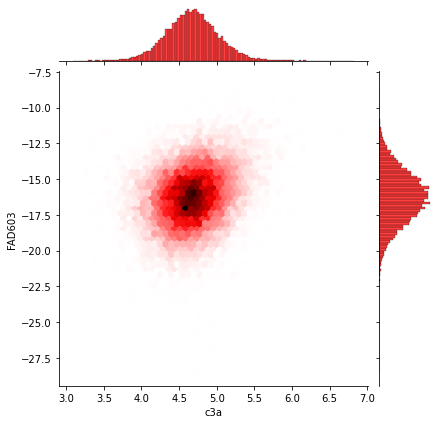

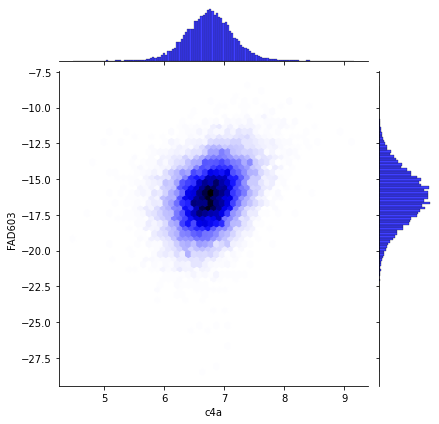

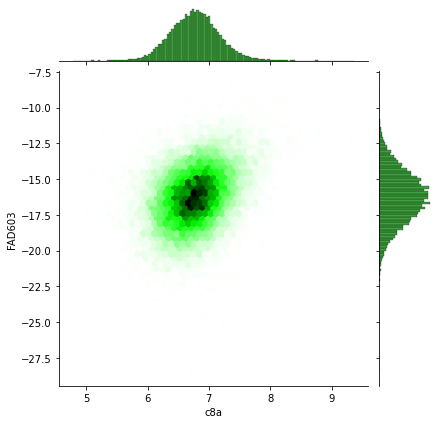

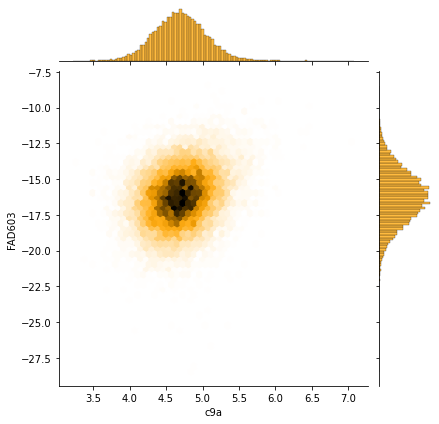

In [7]:
file = 'F0T_A/F0T_A_dies.csv'
data = pd.read_csv(file)
#print(data)
sns.jointplot(data=data, x="c3a", y="FAD603", kind="hex", color='red')
plt.show()
sns.jointplot(data=data, x="c4a", y="FAD603", kind="hex", color='blue')
plt.show()
sns.jointplot(data=data, x="c8a", y="FAD603", kind="hex", color='green')
plt.show()
sns.jointplot(data=data, x="c9a", y="FAD603", kind="hex", color='orange')
plt.show()